In [37]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('result.csv')

df = df.fillna(0)
print(df)
region = df.region_name.unique()

def split_region(i):
    val_state = np.array([region[2*i], region[2*i+1]])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

time_train = df.loc[df['date'] < '2020-08-10']
time_val = df.loc[df['date'] >= '2020-08-10']


    region_name        date  symptom:Adrenal crisis  symptom:Ageusia  \
0        Alaska  2020-03-09                   10.60             0.00   
1        Alaska  2020-03-16                   11.69             0.00   
2        Alaska  2020-03-23                   11.15            16.57   
3        Alaska  2020-03-30                    8.96             8.96   
4        Alaska  2020-04-06                   10.08             7.35   
..          ...         ...                     ...              ...   
175     Wyoming  2020-08-31                    5.03             2.79   
176     Wyoming  2020-09-07                    3.36             3.25   
177     Wyoming  2020-09-14                    4.15             4.97   
178     Wyoming  2020-09-21                    5.64             3.67   
179     Wyoming  2020-09-28                    9.79             4.54   

     symptom:Allergic conjunctivitis  symptom:Amenorrhea  \
0                              11.61               12.79   
1              

In [38]:
from math import sqrt

score_list = []
for k in range(1,100):
    score = 0
    train, val = time_train, time_val
    x_train = train.loc[:, ['symptom:Anosmia', 'symptom:Asphyxia']]
    y_train = train.iloc[:, -1]
    x_val = val.loc[:, ['symptom:Anosmia', 'symptom:Asphyxia']]
    y_val = val.iloc[:,-1]
    neigh = KNN(k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_val)
    print(y_val.values - y_pred)
    score_list.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))





76  38.44117647  25.61764706  31.41176471
 103.58823529  28.86764706  29.05882353  28.72058824  39.13235294
  29.01470588  30.45588235  64.83823529  77.5         25.41176471
  26.41176471  28.76470588  43.94117647  47.88235294  71.73529412
 108.5        170.5        -13.55882353 -15.44117647 -11.07352941
 -14.92647059 -14.92647059 -13.82352941 -13.07352941 -14.02941176
  -0.38235294   3.08823529   4.51470588  -1.92647059  -7.48529412
  -3.01470588   2.76470588   6.98529412]
[-14.66666667 -15.44927536 -15.94202899 -13.28985507 -14.97101449
 -14.1884058  -13.4057971  -14.30434783  25.17391304  38.52173913
  38.50724638  39.72463768  38.66666667  24.92753623  31.60869565
 103.7826087   28.84057971  28.7826087   28.68115942  39.33333333
  29.23188406  30.46376812  65.05797101  77.71014493  25.36231884
  26.60869565  28.97101449  43.94202899  47.97101449  71.71014493
 108.71014493 170.71014493 -14.04347826 -15.42028986 -11.43478261
 -15.02898551 -15.04347826 -13.73913043 -13.13043478 -13.82

In [39]:
print(min(score_list))
print(score_list)

41.31207450612956
[41.31207450612956, 45.08608663804537, 45.56184746522516, 45.76546585126533, 46.34062292776537, 45.90680348795243, 45.96970590012751, 46.07574860352244, 45.587900667203336, 45.67322793497303, 46.24333210813003, 45.93618195388032, 45.97063931997444, 45.771427735420005, 45.468599258373004, 45.35415829313963, 45.40418016135263, 45.30159422471147, 45.069267377643556, 44.794557658641224, 44.6377288059709, 44.417170917495966, 44.38233019411393, 44.185557575568616, 44.13092793042086, 43.76632092024062, 43.50231475322766, 43.291998330786136, 43.1569202809141, 43.00506268646363, 42.94737728399785, 42.75988226993009, 42.59027867145881, 42.47087360211825, 42.43998764161469, 42.4782688480978, 42.46477328101076, 42.49547885489831, 42.492746187118826, 42.47650499467323, 42.52781761586122, 42.54269175420288, 42.552574746318385, 42.67987415196313, 42.804559197191175, 42.8684067736004, 42.93168035360373, 42.983715933259354, 42.8689622712202, 43.03922745589191, 43.07836917762162, 43.11

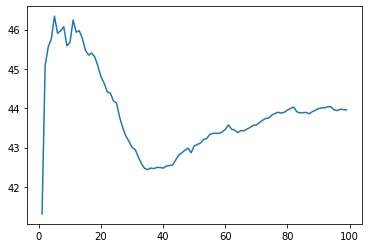

In [40]:
plt.plot(range(1,100),score_list)